In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [ ]:
df = pd.read_csv('/Customer-Purchases-Behaviour/customer_data.csv')

# Data Representation

In [43]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


#### drop id column

In [44]:
df.drop(columns = 'id' , inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  int64 
 1   gender              100000 non-null  object
 2   income              100000 non-null  int64 
 3   education           100000 non-null  object
 4   region              100000 non-null  object
 5   loyalty_status      100000 non-null  object
 6   purchase_frequency  100000 non-null  object
 7   purchase_amount     100000 non-null  int64 
 8   product_category    100000 non-null  object
 9   promotion_usage     100000 non-null  int64 
 10  satisfaction_score  100000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 8.4+ MB


In [46]:
df.describe().astype('int')

,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000,100000,100000,100000,100000
mean,30,27516,9634,0,5
std,4,12996,4799,0,1
min,12,5000,1118,0,0
25%,27,16271,5583,0,4
50%,30,27584,9452,0,5
75%,33,38747,13350,1,6
max,49,50000,26204,1,10


# Exploarity data analysis EDA

## `ProfileReport`

**What it does**:  
Generates a detailed **Exploratory Data Analysis (EDA)** report for a pandas DataFrame. It provides insights into data structure, missing values, correlations, and distributions.

**Key Features**:  
1. **Automatic Analysis**:  
   - Summarizes data types, unique values, and missing values.  
2. **Descriptive Statistics**:  
   - Calculates mean, median, standard deviation, etc., for numerical columns.  
3. **Visualizations**:  
   - Includes histograms, bar charts, and correlation heatmaps.  
4. **Interactive HTML Report**:  
   - Generates a shareable, interactive report.  

**Installation**:  
```bash
pip install pandas-profiling

In [47]:
from ydata_profiling import ProfileReport

In [48]:
report = ProfileReport(df, title="Customer Report")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
df.head(5)

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


#### product categories contribute the most to total revenue and their relative performance

product_category
Electronics    289707303
Clothing       192585926
Food           143328045
Books          143174565
Health          97291785
Beauty          48947078
Home            48444382
Name: purchase_amount, dtype: int64


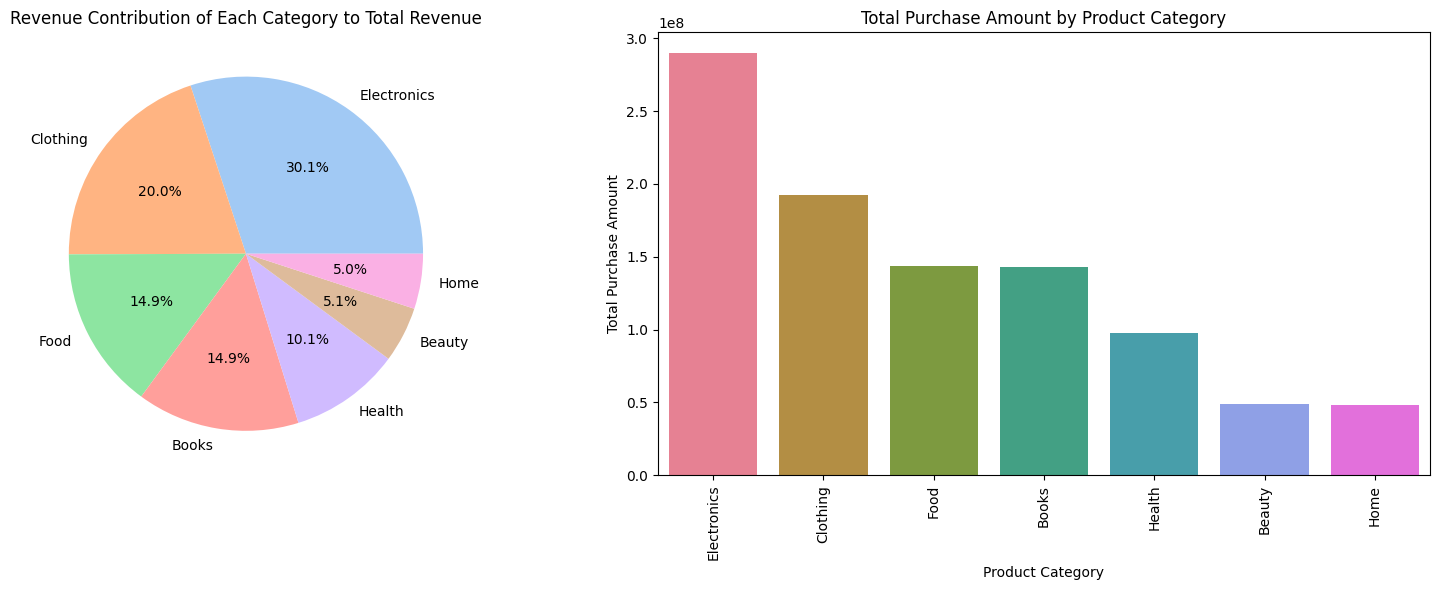

In [50]:

# Group by product_category and sum purchase_amount
total_amount_category = df.groupby('product_category')['purchase_amount'].sum()

# Sort the values in descending order
total_amount_category = total_amount_category.sort_values(ascending=False)

# Print the sorted values
print(total_amount_category)

# Create a figure with two subplots
plt.figure(figsize=(16, 6))

# Subplot 1: Pie chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
colors = sns.color_palette('pastel', len(total_amount_category))
total_amount_category.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Revenue Contribution of Each Category to Total Revenue')
plt.ylabel('')  # Remove the default y-label

# Subplot 2: Bar plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(x=total_amount_category.index, y=total_amount_category.values, palette='husl')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Product Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### The gender distribution of purchases in the Clothing category

   gender  count
0  Female  10059
1    Male   9930


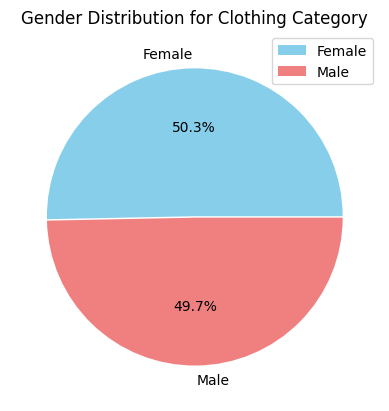

In [51]:
gender_counts = df[df['product_category'] == 'Clothing'].gender.value_counts()
print (gender_counts.reset_index())
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'] , explode =[0 , .01])
plt.ylabel('')
plt.legend()
plt.title('Gender Distribution for Clothing Category')
plt.show()

### identifies the region with the highest purchases for each product category

In [52]:
category_region_counts = df.groupby(['product_category', 'region']).size().reset_index(name='count')
top_regions = category_region_counts.loc[category_region_counts.groupby('product_category')['count'].idxmax()].reset_index(drop=True)
top_regions

,product_category,region,count
0,Beauty,West,1533
1,Books,East,4454
2,Clothing,West,6077
3,Electronics,East,9125
4,Food,West,4468
5,Health,East,3050
6,Home,East,1537


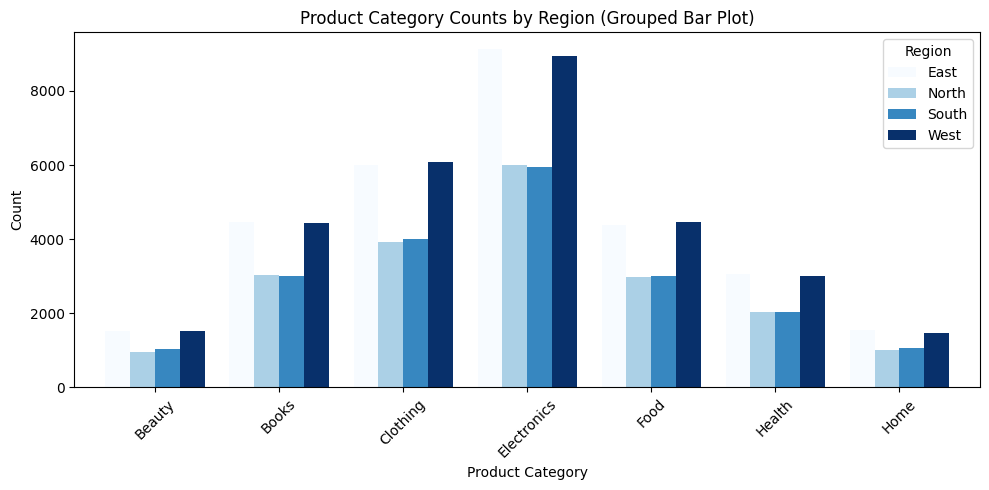

In [53]:
pivot_df = category_region_counts.pivot(index='product_category', columns='region', values='count')

pivot_df.plot(kind='bar', figsize=(10, 5), width=0.8 , colormap='Blues')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Category Counts by Region (Grouped Bar Plot)')
plt.legend(title='Region')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

#### Total purchase amount for each region

In [54]:
df.groupby('region')['purchase_amount'].agg( ['sum'] ).reset_index()

,region,sum
0,East,289173865
1,North,192674021
2,South,193680103
3,West,287951095


#### education levels among customers purchasing in the 'Books' category

In [55]:
df[df['product_category'] == 'Books'].education.value_counts()

education
College       5940
Bachelor      4521
HighSchool    3014
Masters       1450
Name: count, dtype: int64

    Education  Count
0     College   5940
1    Bachelor   4521
2  HighSchool   3014
3     Masters   1450


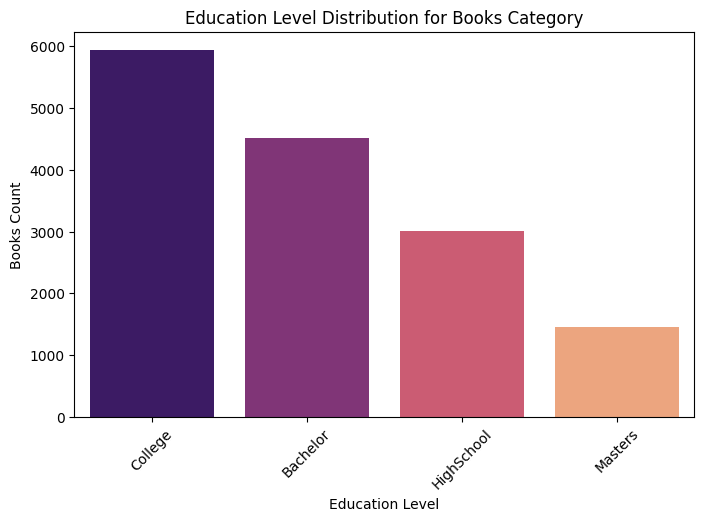

In [56]:
education_counts = df[df['product_category'] == 'Books'].education.value_counts().reset_index()
education_counts.columns = ['Education', 'Count']
print(education_counts)
plt.figure(figsize=(8, 5))
sns.barplot(x='Education', y='Count', data=education_counts, palette='magma')
plt.xlabel('Education Level')
plt.ylabel('Books Count')
plt.title('Education Level Distribution for Books Category')
plt.xticks(rotation=45)  
plt.show()

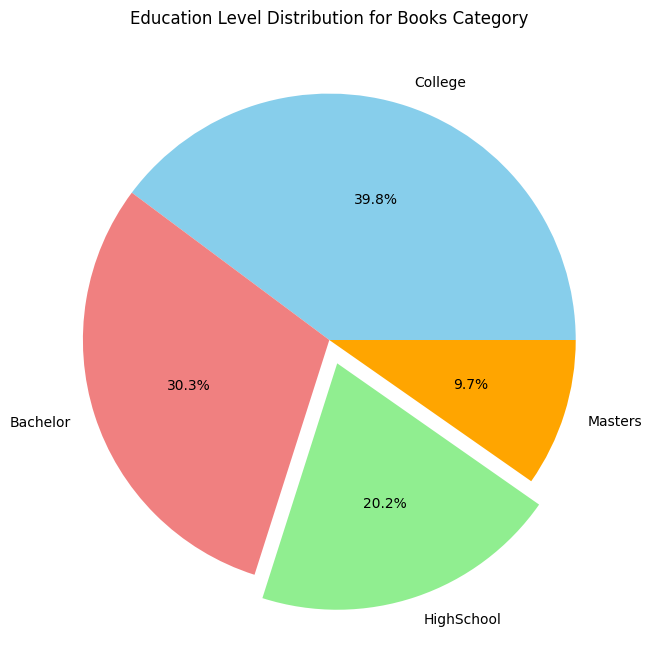

In [57]:
education_counts = df[df['product_category'] == 'Books'].education.value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
education_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'] , explode =[ 0 , 0 , .1 , 0])

plt.title('Education Level Distribution for Books Category')
plt.ylabel('')  
plt.show()

    Education  Count
0     College  11974
1    Bachelor   9205
2  HighSchool   5974
3     Masters   2874


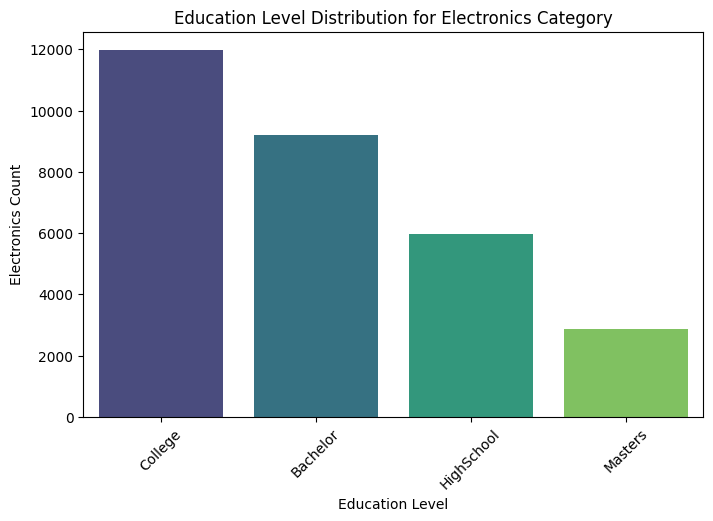

In [58]:
education_counts = df[df['product_category'] == 'Electronics'].education.value_counts().reset_index()
# print()
education_counts.columns = ['Education', 'Count']
print(education_counts)
plt.figure(figsize=(8, 5))
sns.barplot(x='Education', y='Count', data=education_counts, palette='viridis')
plt.xlabel('Education Level')
plt.ylabel('Electronics Count')
plt.title('Education Level Distribution for Electronics Category')
plt.xticks(rotation=45)  
plt.show()

In [59]:
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


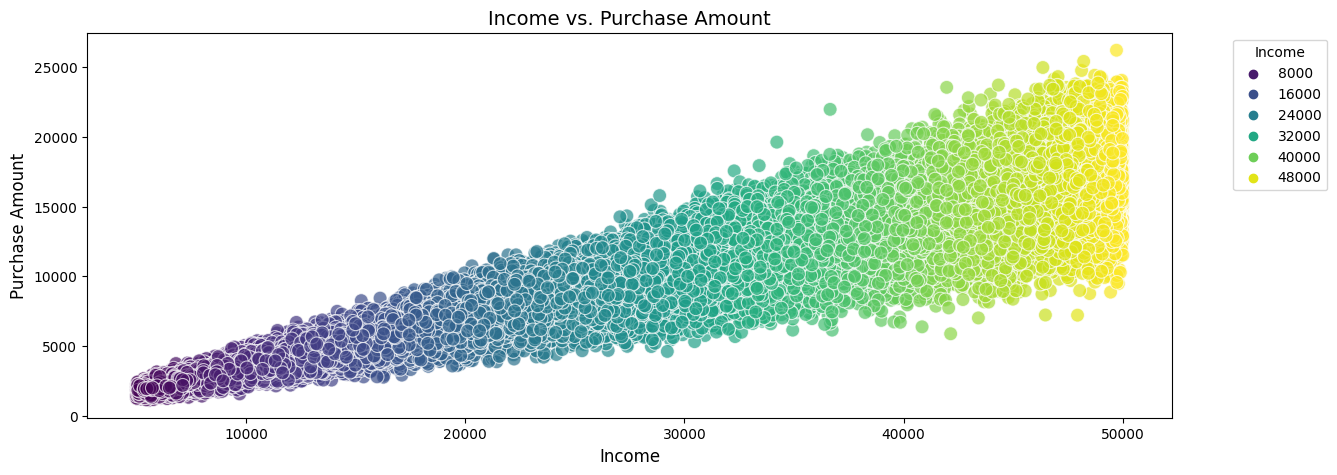

In [60]:
plt.figure(figsize=(14,5))
sns.scatterplot(
    x='income', 
    y='purchase_amount', 
    hue='income',  # Color points by 'income'
    palette='viridis',  # Use a colormap
    data=df, 
    alpha=0.7,  # Adjust transparency
    s=100  # Adjust point size
)

# Add title and labels
plt.title('Income vs. Purchase Amount', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Purchase Amount', fontsize=12)

# Show legend
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

In [61]:
loyalty_status = df.groupby('loyalty_status')['purchase_amount'].sum().reset_index()
loyalty_status

,loyalty_status,purchase_amount
0,Gold,95233484
1,Regular,579728909
2,Silver,288516691


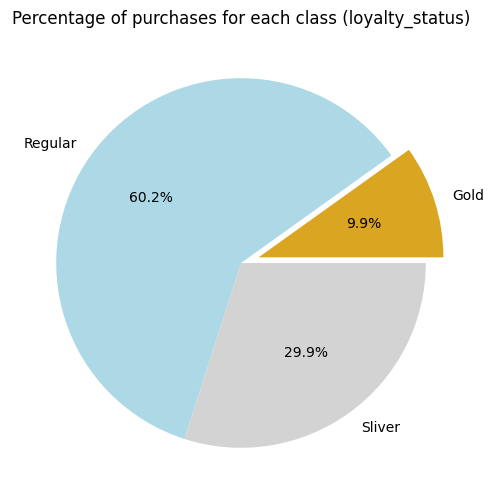

In [62]:
plt.figure(figsize=(6, 6))
loyalty_status['purchase_amount'].plot(kind='pie', autopct='%1.1f%%', colors=['goldenrod', 'lightblue', 'lightgray'] , explode =[ .1 , 0 , 0] , labels=['Gold', 'Regular', 'Sliver']  )
plt.title('Percentage of purchases for each class (loyalty_status)')
plt.ylabel('') 
plt.show()

### Distribution of Satisfaction Score by Loyalty Status

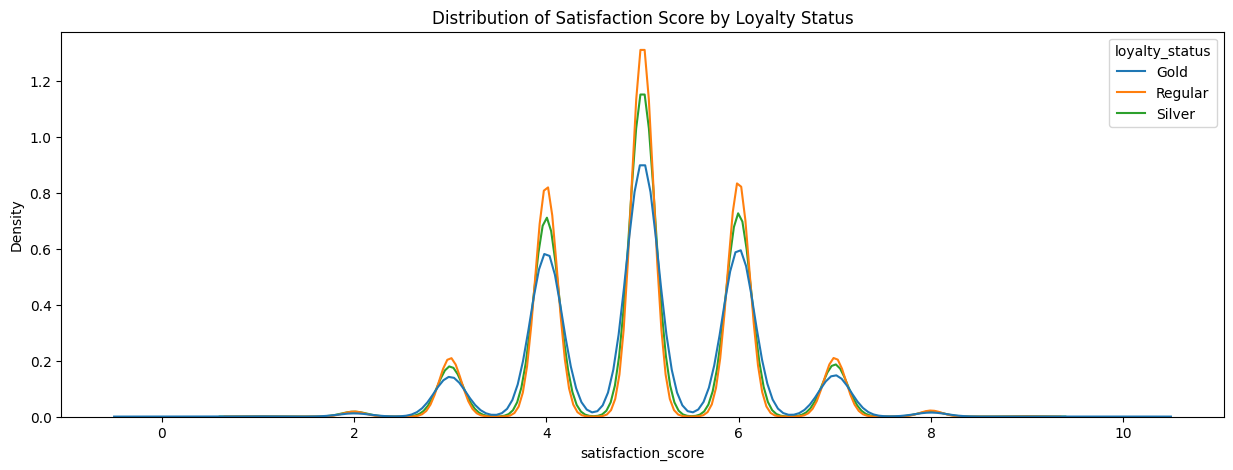

In [63]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=df, x='satisfaction_score', hue='loyalty_status', common_norm=False)
plt.title('Distribution of Satisfaction Score by Loyalty Status')
plt.show()

In [64]:
df.groupby('loyalty_status').satisfaction_score.mean().reset_index()

,loyalty_status,satisfaction_score
0,Gold,5.013033
1,Regular,5.008198
2,Silver,5.011447


In [65]:
summary_stats = df.groupby('promotion_usage').agg({
    'purchase_amount': ['count', 'mean'],  
    'satisfaction_score': 'mean'          
}).reset_index()
print(summary_stats)

  promotion_usage purchase_amount              satisfaction_score
                            count         mean               mean
0               0           69920  9631.150901           5.009425
1               1           30080  9643.251762           5.010173


In [66]:
summary_stats = df.groupby(['promotion_usage' , 'purchase_frequency']).agg({
    'purchase_amount': ['count', 'mean'],  
    'satisfaction_score': 'mean'          
})
print(summary_stats)

                                   purchase_amount               \
                                             count         mean   
promotion_usage purchase_frequency                                
0               frequent                     14069  9607.842633   
                occasional                   20898  9643.448225   
                rare                         34953  9633.180328   
1               frequent                      6026  9638.084301   
                occasional                    8988  9703.970516   
                rare                         15066  9609.095314   

                                   satisfaction_score  
                                                 mean  
promotion_usage purchase_frequency                     
0               frequent                     5.004762  
                occasional                   4.997416  
                rare                         5.018482  
1               frequent                     5.030368  
    

In [67]:
from IPython.display import display
display(summary_stats)

purchase_amount               \
                                             count         mean   
promotion_usage purchase_frequency                                
0               frequent                     14069  9607.842633   
                occasional                   20898  9643.448225   
                rare                         34953  9633.180328   
1               frequent                      6026  9638.084301   
                occasional                    8988  9703.970516   
                rare                         15066  9609.095314   

                                   satisfaction_score  
                                                 mean  
promotion_usage purchase_frequency                     
0               frequent                     5.004762  
                occasional                   4.997416  
                rare                         5.018482  
1               frequent                     5.030368  
                occasional                   5.001224  
                rare                         5.007434

In [68]:
# Group by purchase_frequency and product_category, then count
category_counts = df.groupby(['purchase_frequency', 'product_category']).size().reset_index(name='count')
category_counts

,purchase_frequency,product_category,count
0,frequent,Beauty,1032
1,frequent,Books,2986
2,frequent,Clothing,4043
3,frequent,Electronics,5950
4,frequent,Food,2967
5,frequent,Health,2071
6,frequent,Home,1046
7,occasional,Beauty,1486
8,occasional,Books,4499
9,occasional,Clothing,5958


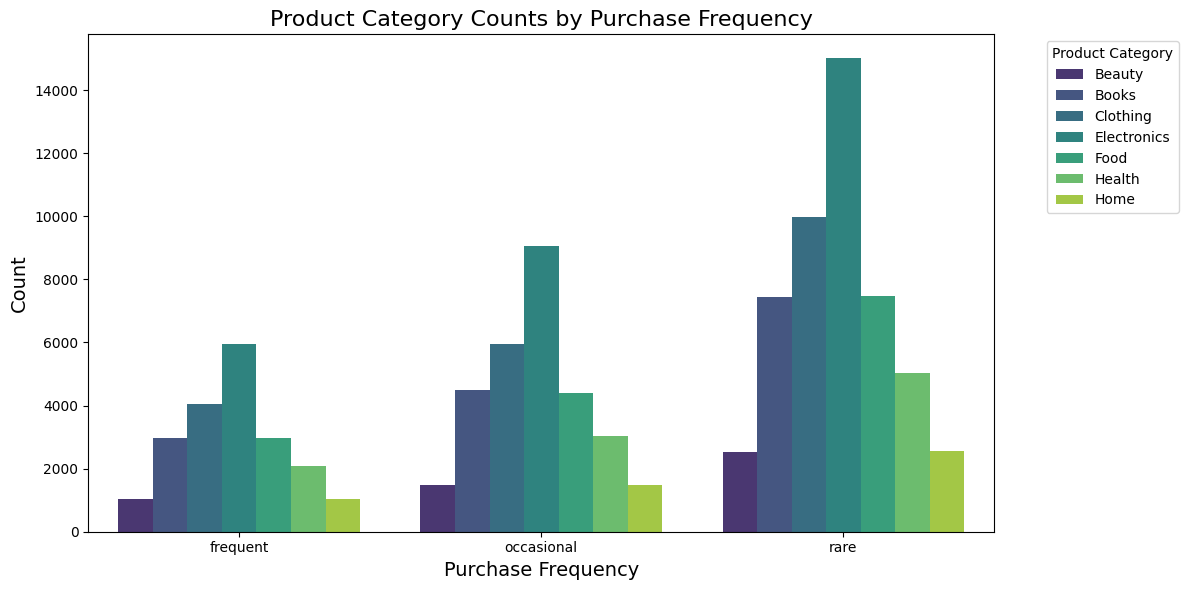

In [69]:

plt.figure(figsize=(12, 6))

sns.barplot(
    x='purchase_frequency', 
    y='count', 
    hue='product_category', 
    data=category_counts, 
    palette='viridis'  # Use a color palette
)


plt.title('Product Category Counts by Purchase Frequency', fontsize=16)
plt.xlabel('Purchase Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()